In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import TargetÇ

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# pre-processing

In [3]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 'rdm_padding']

In [4]:
#loading data
file_in= "".join(['/home/angela/padding_uniprot/', 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df_ori = loading_data(file_in, 'EC number')

#creating dataset for the test
df = pd.DataFrame(columns=['Entry', 'Sequence', 'EC number'])
for i in ['nan', '1.', '2.', '3.', '4.', '5.', '6.', '7.']:
    df_u = df_ori[df_ori['EC number'].str.startswith(i)][:20]
    df = pd.concat([df, df_u])

In [5]:
df.sample(frac=1).reset_index().drop('index', axis=1)

,Entry,Sequence,EC number
0,Q8TPF4,MMIAGIDEAGKGPVIGPMCIGGVKIEESRAHILKVLGVADSKKLTP...,3.1.26.4
1,O50083,MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...,5.3.1.6
2,Q9Y8T0,MPSPPEPPLHWRDCRLEPILGFPRPRELAKSLEVQGEEWIALLESG...,4.1.3.27
3,A3CVJ3,MGSQWTKDSVYRKAMKAGYRARAAYKLLEIQQRNGIIRPDDNVVDL...,2.1.1.166
4,Q6L1E2,MNRKDKYYIRAKRENYRSRASYKIIEINNKYNIVSRGDNVLEFGSS...,2.1.1.166
5,O05207,MSAKEKFTSLSPAEFFKRNPELAGFPNPARALYQTVRELIENSLDA...,5.6.2.3
6,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
7,C3MYZ9,MSIDQRLQLITRNAAEIITIDELRKKLESEEKLKGYIGFEPSGLFH...,6.1.1.1
8,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
9,Q58424,MVKILVTDPLHEDAIKILEEVGEVEVATGLTKEELLEKIKDADVLV...,1.1.1.95


(1248, 592)


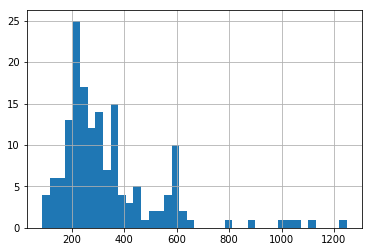

In [6]:
#max len
max_len = looking_max_len(df)
print(max_len)

In [7]:
max_lenn = max_len[1]
df_filt = filtering_over_maxlen(df, max_lenn)

In [8]:
df_filt

,Entry,Sequence,EC number
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan


In [9]:
dicti = creating_dict()

In [10]:
dicti

{'0': 0,
 'A': 1,
 'B': 2,
 'C': 3,
 'D': 4,
 'E': 5,
 'F': 6,
 'G': 7,
 'H': 8,
 'I': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [11]:
dicti_padding = {}
for i in list_paddings:
    dicti_padding[i] = processing_sequences(df_filt, i, max_lenn)

0      MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...
1      MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...
2      MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...
3      MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...
4      MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...
5      MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...
6      MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...
7      MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...
8      MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...
9      MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
10     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
11     MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...
12     MKANVYSMEGEVKEEIELPAIFNEEYRPDLIKRAVISAQTARVQPW...
13     MKVKVFNLEGEPVEEIELPKVFSTPFRPDLIRRAVIASWTHRIQPQ...
14     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
15     MYLELVKKNSVILDKDGNKVKEVELPFIFSFPVRKDIIRRVFLAEF...
16     MQAVEMEKKAGNENPMREVVLDKVVINIGVGESGERHKKAYSLLEE...
17     MPAIDLSTIDLRAIKPSDLDWRKF

0      M000K000T000P000P000V000L000K000R000R000R000E0...
1      M000D000L000E000Y000Q000K0000K000L0000A000A000...
2      M00S00K00L00L00T00E00S00D00S00L00K00V00I00R00R...
3      M00A00F00D00R00Q00K00L00V00E00A00V00K00E00A00K...
4      M00V00S00V00D00Q00V00K00K00A00R00E00G00K00K00R...
5      M00000V00000Q00000K00000P00000H00000S00000F000...
6      M00000V00000K00000R00000T00000H00000G00000Y000...
7      M000000D000000P000000Y000000K000000V000000I000...
8      M000000P000000N000000P000000H000000Y000000R000...
9      M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
10     M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
11     M0N0V0K0V0Y0N0L0D0G0S0E0K0G0D0I0E0L0P0A0V0F0E0...
12     M0K0A0N0V0Y0S0M0E0G0E0V0K0E0E0I0E0L0P0A0I0F0N0...
13     M0K0V0K0V0F0N0L0E0G0E0P0V0E0E0I0E0L0P0K0V0F0S0...
14     M0Y0L0E0L0V0K0K0N0S0V0I0L0D0K0D0G0N0K0V0K0E0V0...
15     M0Y0L0E0L0V0K0K0N0S0V0I0L0D0K0D0G0N0K0V0K0E0V0...
16     M00Q00A00V00E00M00E00K00K00A00G00N00E00N00P00M...
17     M00P00A00I00D00L00S00T00

In [12]:
dicti_padding['ext_padding']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [13]:
# creating binary enzyme/no enzyme label
df_bin = binarizing_EC(df_filt)

1.0    122
0.0     20
Name: enzyme, dtype: int64


In [14]:
df_bin

,Entry,Sequence,EC number,target,enzyme
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fd63942ca58>,0.0
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fd63942ca90>,0.0
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fd63942cac8>,0.0
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fd63942cb00>,0.0
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fd63942cb38>,0.0
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fd63942cb70>,0.0
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fd63942cba8>,0.0
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fd63942cbe0>,0.0
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fd63942cc18>,0.0
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fd63942cc50>,0.0


In [15]:
df_digit1 = first_digit_EC(df_bin)

In [16]:
df_digit1

,Entry,Sequence,EC number,target,enzyme,digit1
0,Q6L1A8,MKTPPVLKRRREGVTDYRKRYRLVISRETRAVIRQTRKGLIIQLVD...,nan,<src.Target.Target object at 0x7fd63942ca58>,0.0,[nan]
1,B1L784,MDLEYQKKLAAKVAGVGLDRVRINPEKIDLVSEAVTRADIRRLIRS...,nan,<src.Target.Target object at 0x7fd63942ca90>,0.0,[nan]
2,B1L6L3,MSKLLTESDSLKVIRRILEGSPKRRFNEAVDLVVVLRGIDLKRDPN...,nan,<src.Target.Target object at 0x7fd63942cac8>,0.0,[nan]
3,Q5JH35,MAFDRQKLVEAVKEAKARAKPRNFTQTVEMAVNLKDVDLRKPENRF...,nan,<src.Target.Target object at 0x7fd63942cb00>,0.0,[nan]
4,Q74M51,MVSVDQVKKAREGKKRRFTQTFELIFNLKNVDLRKYRLSTYIVLPR...,nan,<src.Target.Target object at 0x7fd63942cb38>,0.0,[nan]
5,O74001,MVQKPHSFRRKTRKKLRKHPRRRGLPPLTRFLQEFEVGQKVHIVIE...,nan,<src.Target.Target object at 0x7fd63942cb70>,0.0,[nan]
6,A1RS24,MVKRTHGYRYKSRKLLRKKPRERGLSGLSRLLYEYKPGDRVVIDID...,nan,<src.Target.Target object at 0x7fd63942cba8>,0.0,[nan]
7,Q5JDH1,MDPYKVIIRPLVTEKAVSLIERENKLTFIVDRRATKQDIKRAVEEM...,nan,<src.Target.Target object at 0x7fd63942cbe0>,0.0,[nan]
8,Q975K6,MPNPHYRSTSYRKIHTKLPSGKSTIHYERRKNNRAVCAICKKPLQG...,nan,<src.Target.Target object at 0x7fd63942cc18>,0.0,[nan]
9,A4FVY1,MNVKVYNLDGSEKGDIELPAVFETEYRPDLIKRAVISSLTAKLQPK...,nan,<src.Target.Target object at 0x7fd63942cc50>,0.0,[nan]


There are  0 samples with more than one label
The unique labels are  ['nan', '1', '2', '3', '4', '5', '6', '7']


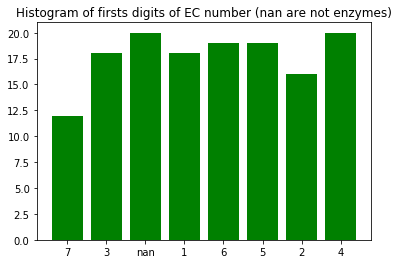

In [17]:
counting_multilabel(df_digit1)

In [18]:
ec_multilabel = encoding_as_multilabel(df_digit1, 'prueba/')

(7,)
Shape of the resulting encoding (142, 7)


In [19]:
ec_multilabel

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [20]:
data_to_hdf5('prueba/', 'data.h5', list_paddings, dicti_padding, np.array(df_digit1['enzyme']), ec_multilabel)

In [25]:
splitting_sets = splitting_sets(0.8, 0.5, dicti_padding['post_padding'], ec_multilabel, 'prueba/', kfold_bool=True, n_splits=3)

In [22]:
len(dicti_padding['post_padding'])

142

In [23]:
ec_multilabel.shape

(142, 7)

In [24]:
aug_seqs_train, aug_task1, aug_task2 = creating_augmented_data(list_paddings, np.array(df_digit1['enzyme']),
                                                        i_train, ec_multilabel)

NameError: name 'i_train' is not defined

In [ ]:
# defining deep learning model
n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77,8]
drop_hid = 0.5
dict_size = len(dicti)

In [ ]:
model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', 'prueba/')
#model = building_1convdense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, 6,'softmax', 'prueba/')
#model = building_stackconv_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 10, [1,3,5,9,15], 10, 'softmax', 'prueba/')

In [26]:
i_train = splitting_sets[0][0]
i_train

array([ 29,  11,  62,  65,  22,  21,  79,  43, 114,  63, 116, 139,  38,
        20,  13,  47,  51, 107, 109,   0, 111,  70,  25, 100,  71, 125,
        18,   1,  67, 105, 136, 110, 138, 106,  80, 118,  31,  86, 130,
        75,  16, 108,  58,  83,  12, 140,  77,   6, 131, 134,   2, 113,
        34, 115,  40,  76,  42,  37,   7, 127, 141,  24, 121, 129,  48,
        66,  89, 132,  92,  44, 128,  30,  52, 120,  84,  64,  54,  14,
        93,  55,  27,  87,  46,  95,  45,  73, 126,  90, 102, 133,  99,
        72,  61, 104,   3, 101, 117,  28,  85,  98,  36,  10,  81,  41,
        19,  26,  39, 112,   4,  15,  91,  68,  69])

In [87]:
from itertools import chain

def creating_augmented_data(vars_padding, labels_task1, indices, folder, name_file, 
                            labels_task2 = None, kfold_bool = False):
    """creating augmented data from all the types of padding from a specific set of indices"""
    #creating idx of the length of data
    idx_data = len(vars_padding[0])
    #creating empty list for sequences and labels
    seqs, lbl_task1, lbl_task2 = [],[],[]
    #joining the paddings
    for idx in idx_data:
        for padding_type in vars_padding:
            seqs.append(padding_type[idx]), lbl_task1.append(labels_task1[idx])
            if labels_task2 != None:
                lbl_task2.append(labels_task2[idx])
    #saving data
    if not os.path.exists("".join([absPath, 'data/', folder])):
            os.makedirs("".join([absPath, 'data/', folder]))
    file_h5 = os.path.join(absPath, 'data/', folder, name_file)
    h5_bin = h5py.File(file_h5, 'w')
    h5_bin.create_dataset('x', data=seqs)
    if isinstance(labels_task1, np.ndarray):
        h5_bin.create_dataset('labels_task1', data=lbl_task1)
    if isinstance(labels_task2, np.ndarray):
        h5_bin.create_dataset('labels_task2', data=lbl_task2)
    h5_bin.close()
    #defining splitting
    if kfold_bool == False:
        #indices should be a tuple with i_train, i_val and i_test
        i_train, i_val, i_test = indices
        #creating new i_train, i_test and i_Val for augmented data
        new_i_train = list(chain(*[list(range(x*len(vars_padding),(x*len(vars_padding)+len(vars_padding)))) 
                   for idx,x in enumerate(i_train)]))
        new_i_val = list(chain(*[list(range(x*len(vars_padding),(x*len(vars_padding)+len(vars_padding)))) 
                   for idx,x in enumerate(i_val)]))
        new_i_test = list(chain(*[list(range(x*len(vars_padding),(x*len(vars_padding)+len(vars_padding)))) 
                   for idx,x in enumerate(i_test)]))
        file_idcs = os.path.join(absPath, 'data/', folder, 'idcs_aug_split.pickle')
        with open(file_idcs, "wb") as output_file:
            pickle.dump((new_i_train, new_i_val, new_i_test), output_file)
    else:
        k_indices = []
        for k_fold in indices:
            i_train, i_val, i_test = k_fold
            new_i_train = list(chain(*[list(range(x*len(vars_padding),(x*len(vars_padding)+len(vars_padding)))) 
                   for idx,x in enumerate(i_train)]))
            new_i_val = list(chain(*[list(range(x*len(vars_padding),(x*len(vars_padding)+len(vars_padding)))) 
                   for idx,x in enumerate(i_val)]))
            new_i_test = list(chain(*[list(range(x*len(vars_padding),(x*len(vars_padding)+len(vars_padding)))) 
                   for idx,x in enumerate(i_test)]))
            k_indices.append((new_i_train, new_i_val, new_i_test))
        file_idcs = os.path.join(absPath, 'data/', folder, 'idcs_aug_split.pickle')
        with open(file_idcs, "wb") as output_file:
            pickle.dump(k_indices, output_file)

In [ ]:
seqs, lbl_task1, lbl_task2 = [],[],[]
new_i_train
for i in list_paddings:
    

In [ ]:
len(dicti_padding)

In [ ]:
isinstance(ec_multilabel, np.ndarray)

In [74]:
types_padding = [pre, post, mid, rdm]
post = ['aa0', 'bb0', 'cc0', 'dd0', 'ee0']
pre = ['0aa', '0bb', '0cc', '0dd', '0ee']
mid = ['a0a', 'b0b', 'c0c', 'd0d', 'e0e']
rdm = ['aai', 'bib', 'cci', 'idd', 'eie']
labels = [0,1,0,1,0]
labels_2 = [1,2,3,4,5]
i_train = [0,2,4]
i_test = [1,3]

In [80]:
aug, task1, task2 = [], [], []
for i in range(len(post)):
    for j in types_padding:
        aug.append(j[i]), task1.append(labels[i]), task2.append(labels_2[i])
    #aug.append(post[i]), aug.append(pre[i])

In [77]:
aug

['0aa',
 'aa0',
 'a0a',
 'aai',
 '0bb',
 'bb0',
 'b0b',
 'bib',
 '0cc',
 'cc0',
 'c0c',
 'cci',
 '0dd',
 'dd0',
 'd0d',
 'idd',
 '0ee',
 'ee0',
 'e0e',
 'eie']

In [78]:
task1

[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]

In [79]:
task2

[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]

In [68]:
prueba_i = [list(range(x*len(types_padding),(x*len(types_padding)+len(types_padding)))) for idx,x in enumerate(i_train)]
prueba_i

[[0, 1, 2, 3], [8, 9, 10, 11], [16, 17, 18, 19]]

In [83]:
from itertools import chain 
new_i_train = list(chain(*prueba_i))
print(new_i_train)
shuffled = random.shuffle(new_i_train)
print(new_i_train)

[0, 1, 2, 3, 8, 9, 10, 11, 16, 17, 18, 19]
[11, 10, 18, 8, 16, 9, 3, 0, 1, 19, 2, 17]


In [84]:
[aug[i] for i in new_i_train]

['cci',
 'c0c',
 'e0e',
 '0cc',
 '0ee',
 'cc0',
 'aai',
 '0aa',
 'aa0',
 'eie',
 'a0a',
 'ee0']

In [85]:
[task1[i] for i in new_i_train]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [86]:
[task2[i] for i in new_i_train]

[3, 3, 5, 3, 5, 3, 1, 1, 1, 5, 1, 5]

In [70]:
#probamos a shuffle
index_shuf = random.shuffle(new_i_train)
index_shuf

In [71]:
new_i_train

[1, 17, 18, 2, 19, 9, 3, 11, 10, 16, 8, 0]